In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

In [47]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
#data["Date"] = data.index
data = data[[ "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
#data.reset_index(drop=True, inplace=True)
print(data.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-11  129.201996  130.440002  128.750000  130.169998  130.169998   
2023-08-14  129.850006  131.910004  129.589996  131.830002  131.830002   
2023-08-15  131.589996  131.990005  129.819000  130.270004  130.270004   
2023-08-16  129.279999  130.897995  128.460007  129.110001  129.110001   
2023-08-17  130.449997  132.490997  129.850006  130.460007  130.460007   

              Volume  
Date                  
2023-08-11  15191500  
2023-08-14  17526200  
2023-08-15  14769200  
2023-08-16  17548400  
2023-08-17  23651900  


In [48]:
data=data['Close']
data.reset_index(drop=True, inplace=True)
print(data.head())

0    120.860001
1    118.120003
2    115.070000
3    114.769997
4    114.699997
Name: Close, dtype: float64


In [49]:
data.dtypes

dtype('float64')

In [ ]:
data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


<Figure size 640x480 with 0 Axes>

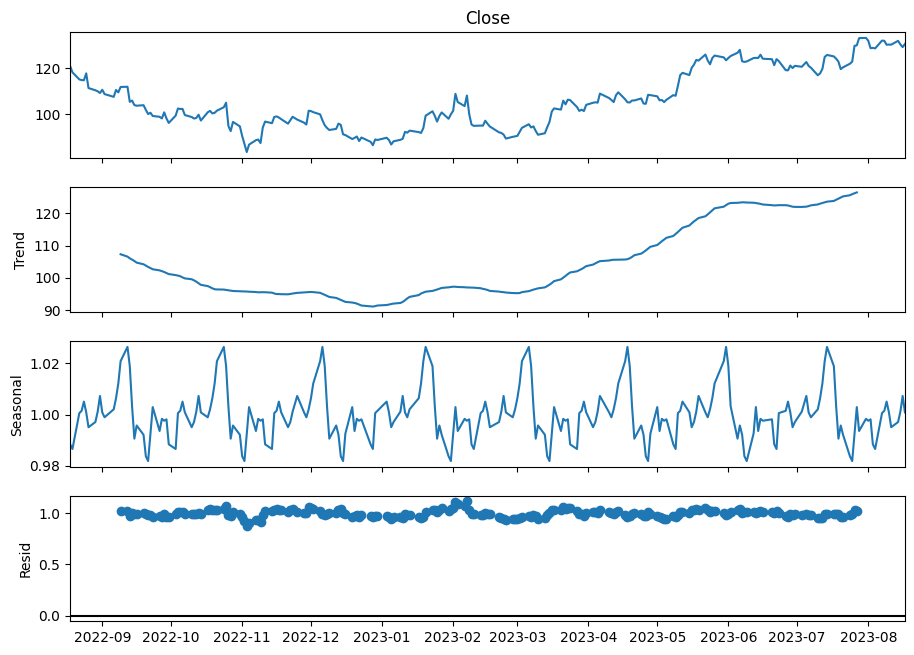

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data,
                            model='multiplicative',period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 7)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

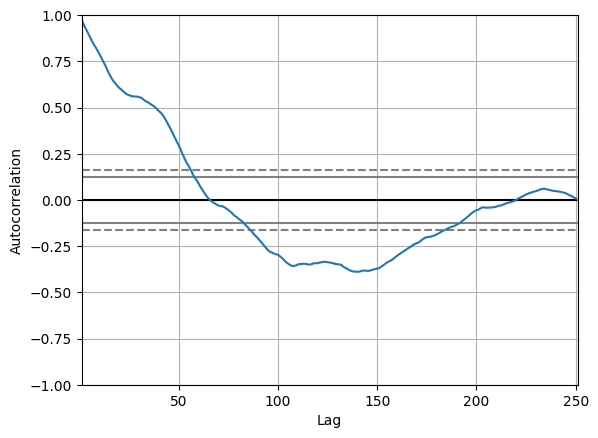

In [34]:
pd.plotting.autocorrelation_plot(data)

In [18]:
p=10 #(Curve moving down after 10th linee)

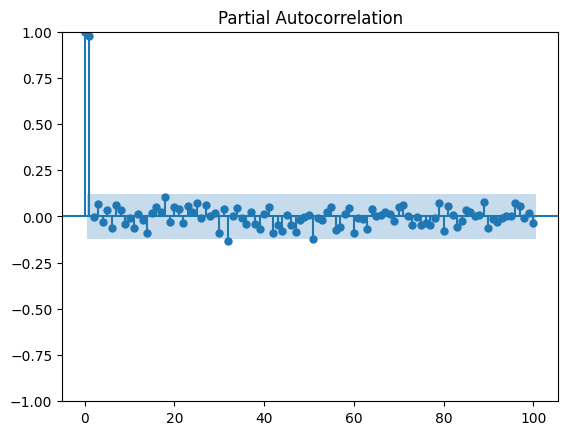

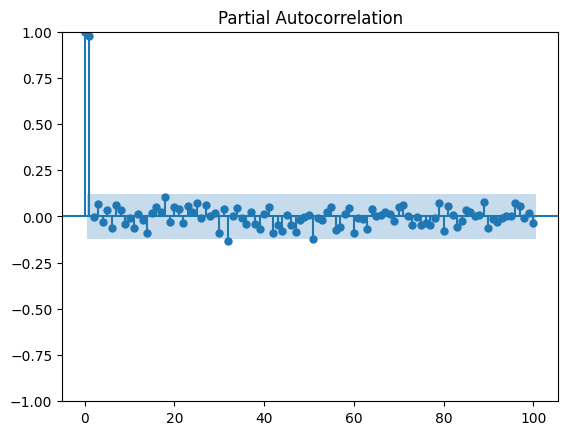

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags = 100)

In [20]:
### There are only two points far away from all the points. So q=2 (Moving Average)
q=2

In [21]:
# If the data is stationary, we should use 0, and if the data is seasonal, we should use 1.
#  As our data is seasonal, we should use 1 as the d value.
d=1

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data, order=(p,d,q))
fitted = model.fit(disp=-1)
print(fitted.summary())

NotImplementedError: ignored

In [23]:
import statsmodels.api as sm

In [50]:
model = sm.tsa.arima.ARIMA(data, order=(p,q,d))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                ARIMA(10, 2, 1)   Log Likelihood                -560.353
Date:                Fri, 18 Aug 2023   AIC                           1144.706
Time:                        12:10:04   BIC                           1186.915
Sample:                             0   HQIC                          1161.696
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0403      0.072      0.563      0.574      -0.100       0.181
ar.L2         -0.1258      0.073     -1.716      0.086      -0.269       0.018
ar.L3          0.0216      0.071      0.306      0.7

In [54]:
predictions = result.predict()
print(predictions)

0        0.000000
1      181.290050
2      115.380561
3      112.150969
4      112.981706
          ...    
246    130.919845
247    130.169660
248    131.942959
249    129.540911
250    129.850289
Name: predicted_mean, Length: 251, dtype: float64


In [42]:
### The data is seasonal that is why uit is not giving correct predictions, so we need to use seasonal arima

In [51]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data,
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  251
Model:             SARIMAX(10, 1, 2)x(10, 1, 2, 12)   Log Likelihood                -540.000
Date:                              Fri, 18 Aug 2023   AIC                           1129.999
Time:                                      12:14:16   BIC                           1216.806
Sample:                                           0   HQIC                          1164.984
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2106      0.090    -13.498      0.000      -1.386      -1.035
ar.L2         -0.99

In [43]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    130.413994
252    132.290165
253    131.334991
254    132.568545
255    135.922293
256    133.813232
257    133.539082
258    132.435469
259    132.589746
260    133.942152
261    132.884497
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

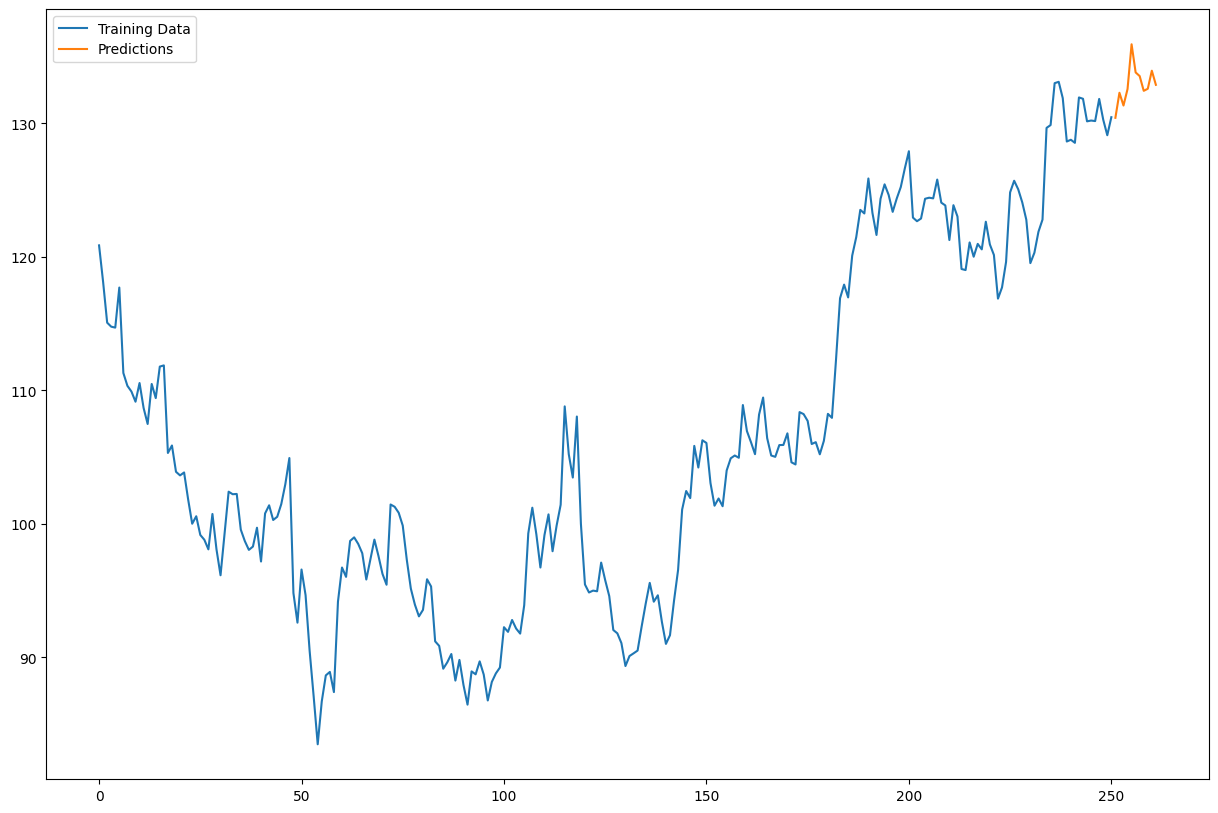

In [52]:
data.plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")